In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import mannwhitneyu
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
import warnings
import re
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("genes/combined-gene-on-off.csv")
df_enhancer_counts = pd.read_csv("genes/ESC-enhancer-info.csv")
df = pd.merge(df, df_enhancer_counts.drop_duplicates(), on=["gene", "celltype"])
df.shape, df_enhancer_counts.shape

((54, 50), (54, 9))

In [3]:
df.columns

Index(['gene', 'off-period', 'on-period', 'off-mean', 'on-mean', 'K-off-rate',
       'K-on-rate', 'off-median', 'on-median', 'off-period-counts',
       'on-period-counts', 'TATA_group', 'inr_group', 'chr_x', 'strand_x',
       'TSS', 'geneID', 'TATA +', 'YY1 +', 'SP +', 'SP -', 'ETS +', 'ETS -',
       'NFY +', 'NFY -', 'CREB +', 'CREB -', 'NRF1 +', 'NRF1 -', 'ZNF143 +',
       'ZNF143 -', 'U1 snRNP +', 'chr_y', 'start', 'end', 'strand_y',
       'gene_id', 'transcript_id', 'distance2tss', 'celltype', 'cluster',
       'gene_type', 'comment', 'Enhancer_promoter_counts',
       'Enhancer_intergenic_counts', 'Enhancer_genic_counts', 'self_enhancer',
       'other_enhancer', 'enhancer_counts', 'enhancer_info'],
      dtype='object')

In [4]:
df.head(1)

,gene,off-period,on-period,off-mean,on-mean,K-off-rate,K-on-rate,off-median,on-median,off-period-counts,on-period-counts,TATA_group,inr_group,chr_x,strand_x,TSS,geneID,TATA +,YY1 +,SP +,SP -,ETS +,ETS -,NFY +,NFY -,CREB +,CREB -,NRF1 +,NRF1 -,ZNF143 +,ZNF143 -,U1 snRNP +,chr_y,start,end,strand_y,gene_id,transcript_id,distance2tss,celltype,cluster,gene_type,comment,Enhancer_promoter_counts,Enhancer_intergenic_counts,Enhancer_genic_counts,self_enhancer,other_enhancer,enhancer_counts,enhancer_info
0,AC092844.1,"[22, 224, 117, 43, 21, 4, 6, 2, 77, 26, 10, 7,...","[40, 2, 18, 52, 2, 18, 3, 17, 2, 11, 18, 5, 10...",25.966102,22.892857,0.043682,0.038512,15.0,18.0,59,56,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H9D0,cluster1,uncertain,NaN,0,0,0,0,0,0,{}


In [5]:
df_ESC_D0 = df[df["celltype"]=="H9D0"]#[["gene", "off-mean", "on-mean"]]
df_ESC_D3 = df[df["celltype"]=="H9D3"]#[["gene", "off-mean", "on-mean"]]
df_ESC_D0.shape, df_ESC_D3.shape, 

((23, 50), (31, 50))

In [6]:
df_ESC = pd.merge(df_ESC_D0, df_ESC_D3, on="gene", suffixes=("_ESC_D0", "_ESC_D3"))
df_ESC.shape

(15, 99)

In [7]:
df_ESC.head()

,gene,off-period_ESC_D0,on-period_ESC_D0,off-mean_ESC_D0,on-mean_ESC_D0,K-off-rate_ESC_D0,K-on-rate_ESC_D0,off-median_ESC_D0,on-median_ESC_D0,off-period-counts_ESC_D0,on-period-counts_ESC_D0,TATA_group_ESC_D0,inr_group_ESC_D0,chr_x_ESC_D0,strand_x_ESC_D0,TSS_ESC_D0,geneID_ESC_D0,TATA +_ESC_D0,YY1 +_ESC_D0,SP +_ESC_D0,SP -_ESC_D0,ETS +_ESC_D0,ETS -_ESC_D0,NFY +_ESC_D0,NFY -_ESC_D0,CREB +_ESC_D0,CREB -_ESC_D0,NRF1 +_ESC_D0,NRF1 -_ESC_D0,ZNF143 +_ESC_D0,ZNF143 -_ESC_D0,U1 snRNP +_ESC_D0,chr_y_ESC_D0,start_ESC_D0,end_ESC_D0,strand_y_ESC_D0,gene_id_ESC_D0,transcript_id_ESC_D0,distance2tss_ESC_D0,celltype_ESC_D0,cluster_ESC_D0,gene_type_ESC_D0,comment_ESC_D0,Enhancer_promoter_counts_ESC_D0,Enhancer_intergenic_counts_ESC_D0,Enhancer_genic_counts_ESC_D0,self_enhancer_ESC_D0,other_enhancer_ESC_D0,enhancer_counts_ESC_D0,enhancer_info_ESC_D0,off-period_ESC_D3,on-period_ESC_D3,off-mean_ESC_D3,on-mean_ESC_D3,K-off-rate_ESC_D3,K-on-rate_ESC_D3,off-median_ESC_D3,on-median_ESC_D3,off-period-counts_ESC_D3,on-period-counts_ESC_D3,TATA_group_ESC_D3,inr_group_ESC_D3,chr_x_ESC_D3,strand_x_ESC_D3,TSS_ESC_D3,geneID_ESC_D3,TATA +_ESC_D3,YY1 +_ESC_D3,SP +_ESC_D3,SP -_ESC_D3,ETS +_ESC_D3,ETS -_ESC_D3,NFY +_ESC_D3,NFY -_ESC_D3,CREB +_ESC_D3,CREB -_ESC_D3,NRF1 +_ESC_D3,NRF1 -_ESC_D3,ZNF143 +_ESC_D3,ZNF143 -_ESC_D3,U1 snRNP +_ESC_D3,chr_y_ESC_D3,start_ESC_D3,end_ESC_D3,strand_y_ESC_D3,gene_id_ESC_D3,transcript_id_ESC_D3,distance2tss_ESC_D3,celltype_ESC_D3,cluster_ESC_D3,gene_type_ESC_D3,comment_ESC_D3,Enhancer_promoter_counts_ESC_D3,Enhancer_intergenic_counts_ESC_D3,Enhancer_genic_counts_ESC_D3,self_enhancer_ESC_D3,other_enhancer_ESC_D3,enhancer_counts_ESC_D3,enhancer_info_ESC_D3
0,AC092844.1,"[22, 224, 117, 43, 21, 4, 6, 2, 77, 26, 10, 7,...","[40, 2, 18, 52, 2, 18, 3, 17, 2, 11, 18, 5, 10...",25.966102,22.892857,0.043682,0.038512,15.0,18.0,59,56,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H9D0,cluster1,uncertain,NaN,0,0,0,0,0,0,{},"[5, 36, 5, 14, 145, 18, 33, 6, 3, 5, 52, 4, 9,...","[1, 4, 14, 3, 29, 3, 2, 77, 43, 104, 2, 1, 4, ...",23.125,26.800000,0.037313,0.043243,8.0,4.0,16,15,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H9D3,cluster1,uncertain,NaN,0,0,0,0,0,0,{}
1,SON,"[14, 14, 31, 57, 189, 35, 7, 8, 12, 7, 11, 9, ...","[21, 9, 11, 19, 3, 10, 15, 12, 13, 55, 12, 109...",30.000000,22.461538,0.044521,0.033333,13.0,12.0,14,13,without_TATA,without_inr,chr21,+,33543072.0,ENSG00000159140.13,0.005,0.757,0.203,-0.040,-0.165,0.206,1.352,1.325,-0.025,0.027,-0.008,0.063,-0.038,0.568,0.500,chr21,33543038.0,33577481.0,+,ENSG00000159140,NaN,34.0,H9D0,cluster1,simple,NaN,2,0,0,0,0,0,{},"[13, 22, 7, 12, 17, 6, 70]","[2, 29, 3, 16, 2, 28]",21.000,13.333333,0.075000,0.047619,13.0,9.5,7,6,without_TATA,without_inr,chr21,+,33543072.0,ENSG00000159140.13,0.005,0.757,0.203,-0.040,-0.165,0.206,1.352,1.325,-0.025,0.027,-0.008,0.063,-0.038,0.568,0.500,chr21,33543038.0,33577481.0,+,ENSG00000159140,NaN,34.0,H9D3,cluster1,simple,NaN,2,0,0,0,0,0,{}
2,PTBP1,"[16, 29, 7, 3, 20, 7, 2, 2, 55, 2]","[12, 22, 12, 23, 32, 7, 3, 30, 1]",14.300000,15.777778,0.063380,0.069930,7.0,12.0,10,9,with_TATA,without_inr,chr19,+,797414.0,ENSG00000011304.12,0.045,-0.063,0.380,1.035,0.029,0.021,1.653,0.104,0.266,0.009,0.008,0.014,0.204,0.003,0.701,chr19,797075.0,812327.0,+,ENSG00000011304,NaN,339.0,H9D0,cluster1,intronic_enhancer,NaN,1,0,5,2,3,5,"{'PTBP1': 2, 'PLPPR3': 1, 'PRTN3': 1, 'AZU1': 1}","[29, 4, 8, 6]","[36, 21, 24, 3]",11.750,21.000000,0.047619,0.085106,7.0,22.5,4,4,with_TATA,without_inr,chr19,+,797414.0,ENSG00000011304.12,0.045,-0.063,0.380,1.035,0.029,0.021,1.653,0.104,0.266,0.009,0.008,0.014,0.204,0.003,0.701,chr19,797075.0,812327.0,+,ENSG00000011304,NaN,339.0,H9D3,cluster1,simple,NaN,1,0,1,1,0,1,{'PTBP1': 1}
3,EEF1D,"[68, 15, 100, 9, 12, 31, 19, 3, 3, 95, 36, 5, ...","[40, 57, 28, 6, 16, 33, 29, 16, 54, 18, 26, 42...",17.040816,19.775510,0

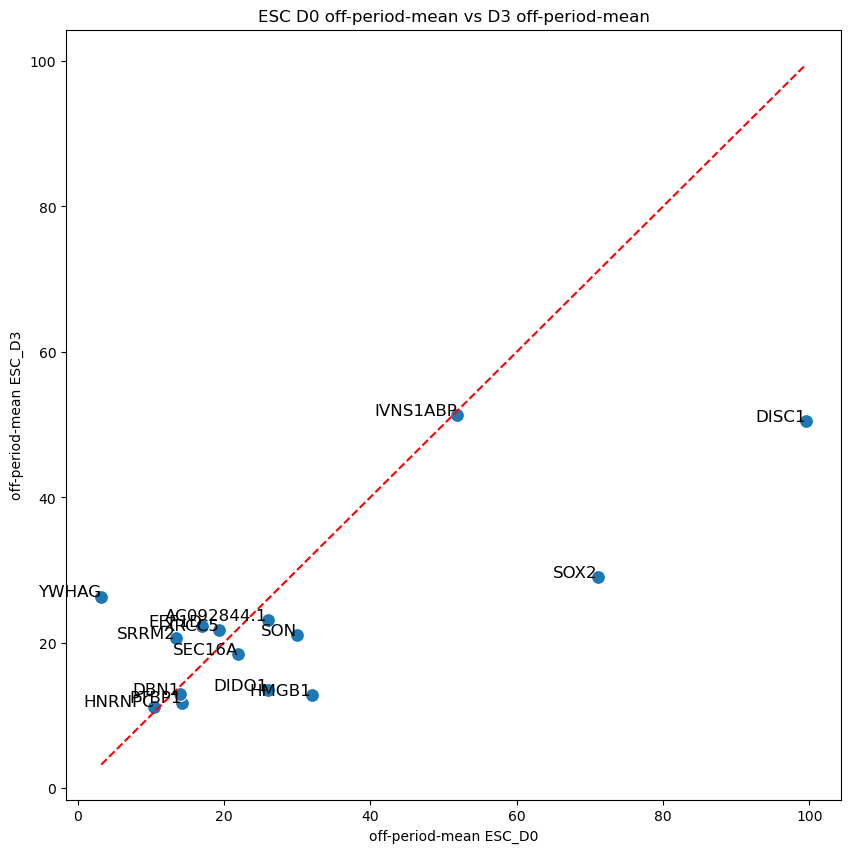

In [8]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='off-mean_ESC_D0', y='off-mean_ESC_D3', data=df_ESC, s=100)
plt.title('ESC D0 off-period-mean vs D3 off-period-mean')
plt.xlabel('off-period-mean ESC_D0')
plt.ylabel('off-period-mean ESC_D3')

# Adding the diagonal line
max_val = max(df_ESC['off-mean_ESC_D0'].max(), df_ESC['off-mean_ESC_D3'].max())
min_val = min(df_ESC['off-mean_ESC_D0'].min(), df_ESC['off-mean_ESC_D3'].min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

# Annotating the points with gene names
for i, row in df_ESC.iterrows():
    plt.text(row['off-mean_ESC_D0'], row['off-mean_ESC_D3'], row['gene'], fontsize=12, ha='right')


plt.show()

In [16]:
df_enhancer_counts[df_enhancer_counts.gene=="YWHAG"]
df_enhancer_counts[df_enhancer_counts.gene=="HMGB1"]
df_enhancer_counts[df_enhancer_counts.gene=="DISC1"]
df_enhancer_counts[df_enhancer_counts.gene=="SOX2"]

,gene,Enhancer_promoter_counts,Enhancer_intergenic_counts,Enhancer_genic_counts,self_enhancer,other_enhancer,enhancer_counts,enhancer_info,celltype
22,SOX2,1,0,0,0,0,0,{},H9D0
53,SOX2,1,0,1,1,0,1,{'SOX2': 1},H9D3


In [10]:
df_ESC["off-period-mean-diff"] = df_ESC["off-mean_ESC_D3"] -  df_ESC["off-mean_ESC_D0"]
df_ESC[["off-period-mean-diff", "off-mean_ESC_D3", "off-mean_ESC_D0", 
       "Enhancer_promoter_counts_ESC_D0", "Enhancer_promoter_counts_ESC_D0"]].head(2)

,off-period-mean-diff,off-mean_ESC_D3,off-mean_ESC_D0,Enhancer_promoter_counts_ESC_D0,Enhancer_promoter_counts_ESC_D0
0,-2.841102,23.125,25.966102,0,0
1,-9.000000,21.000,30.000000,2,2


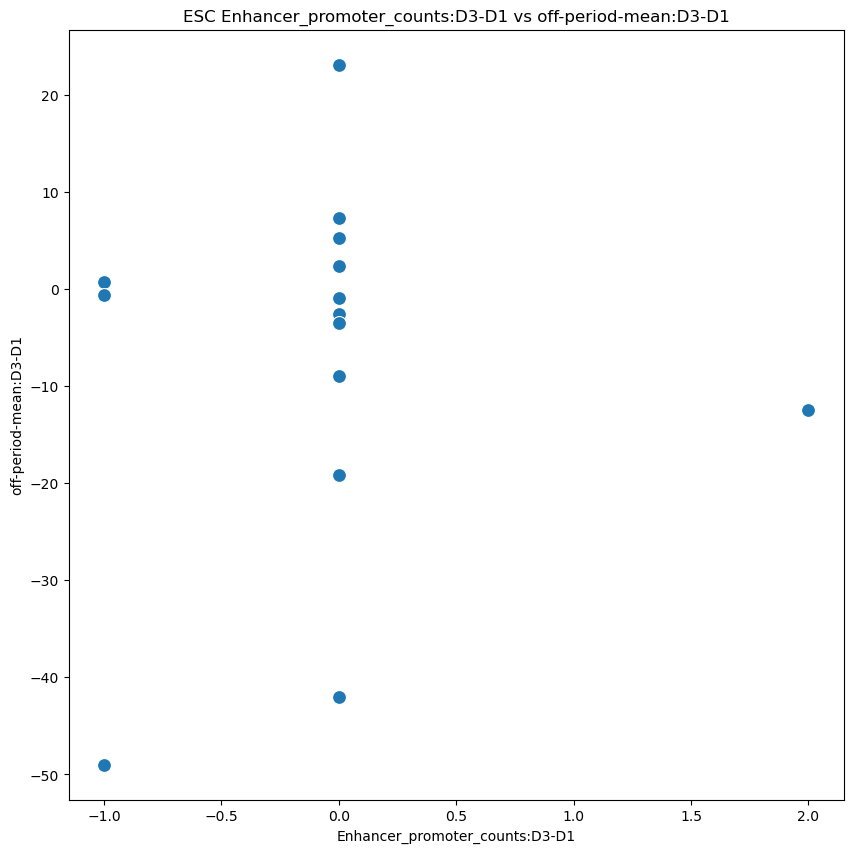

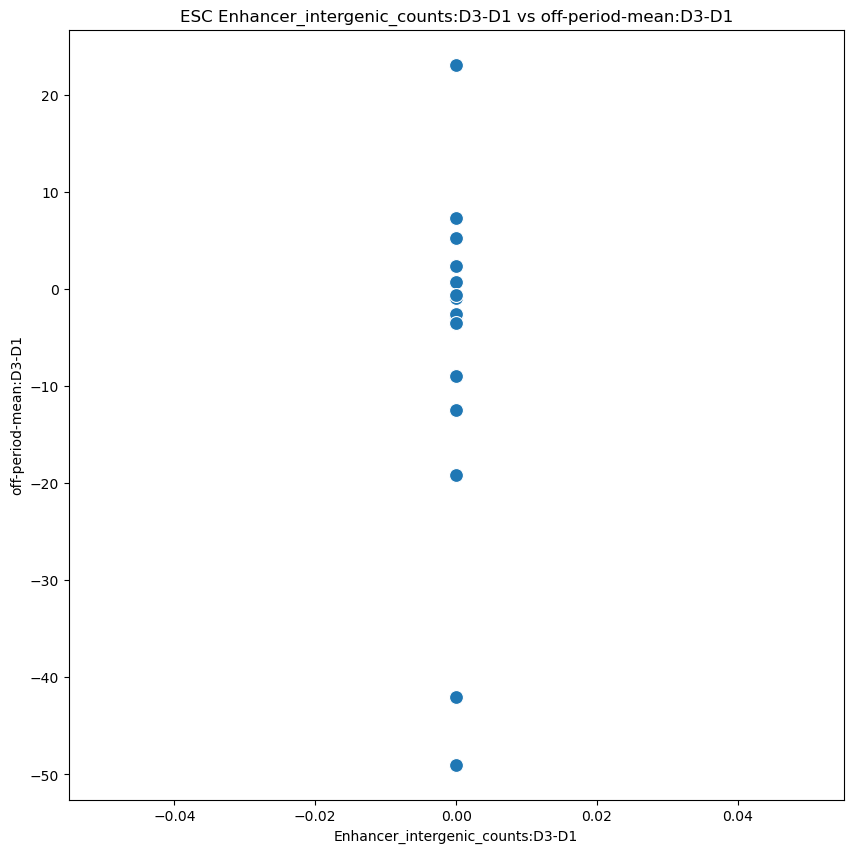

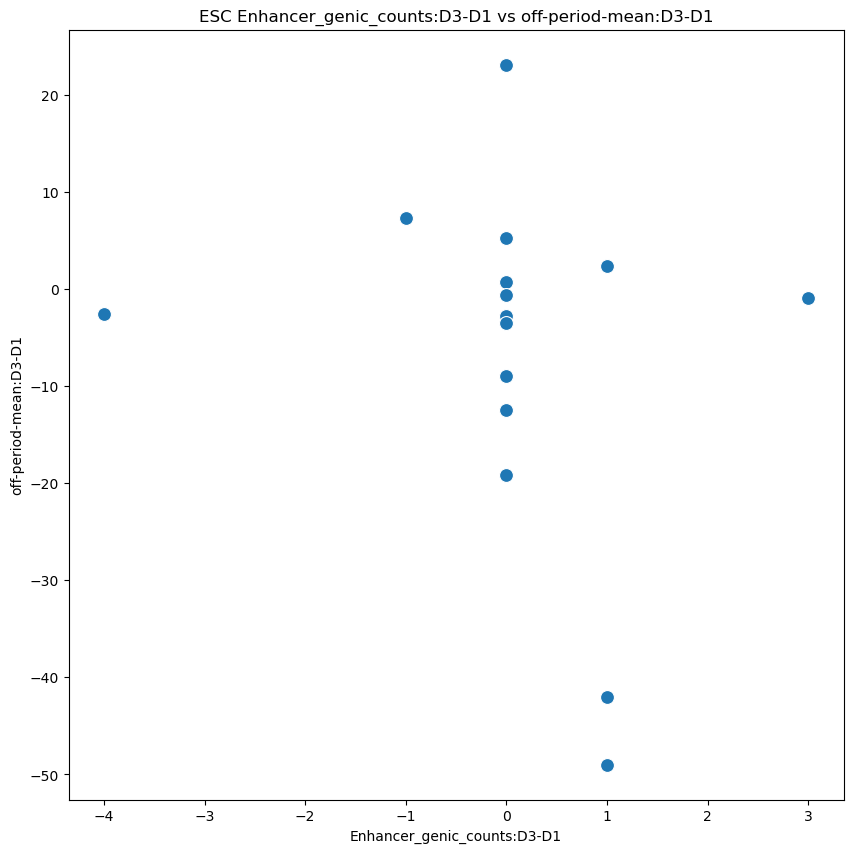

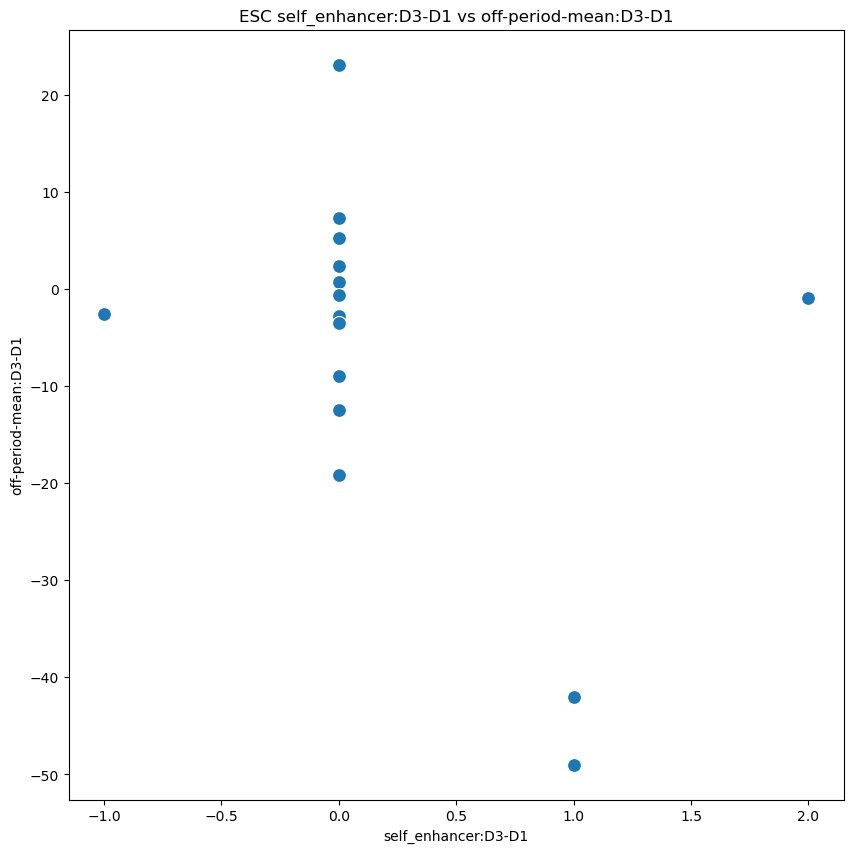

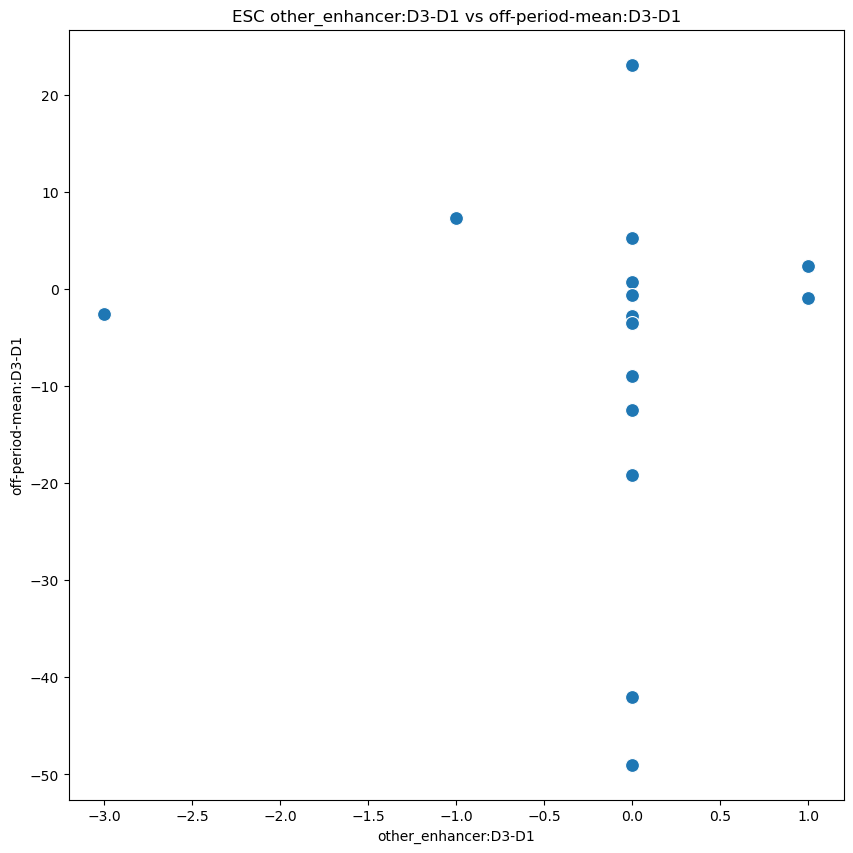

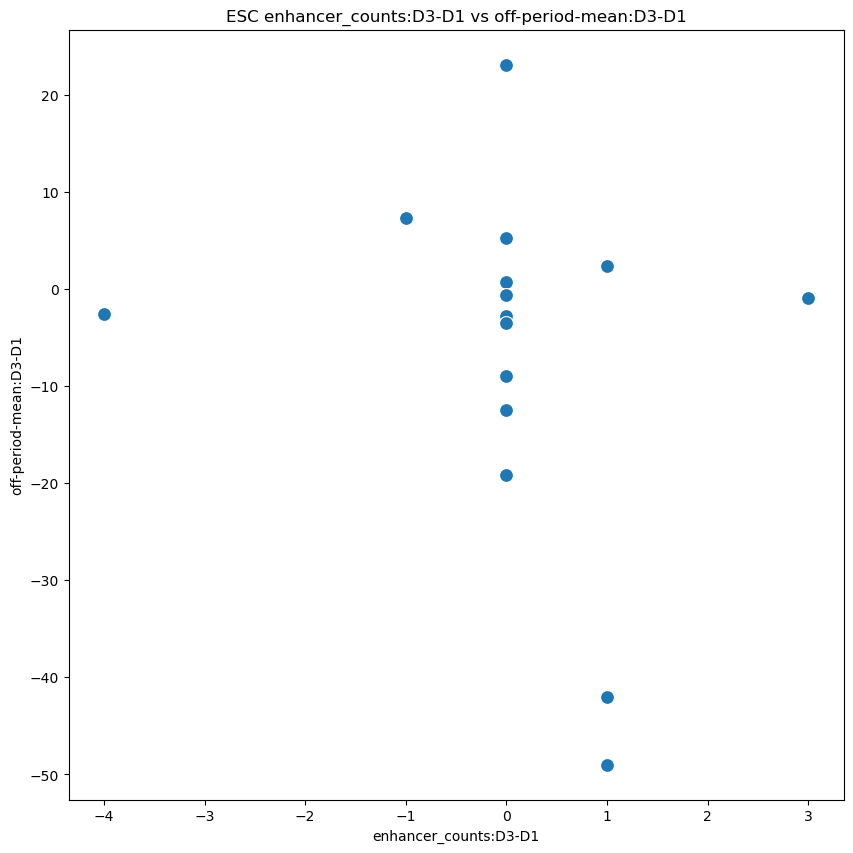

In [11]:


for col in ['Enhancer_promoter_counts',
            'Enhancer_intergenic_counts', 'Enhancer_genic_counts', 'self_enhancer',
            'other_enhancer', 'enhancer_counts']:
    
    df_ESC[f"{col}-diff"] = df_ESC[f"{col}_ESC_D3"] -  df_ESC[f"{col}_ESC_D0"]
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x=f"{col}-diff", y="off-period-mean-diff", data=df_ESC, s=100)
    plt.title(f'ESC {col}:D3-D1 vs off-period-mean:D3-D1')
    plt.xlabel(f'{col}:D3-D1')
    plt.ylabel('off-period-mean:D3-D1')

  

    plt.show()
